<a href="https://colab.research.google.com/github/Saivardhaninkollu/Breast_Cancer_prediction/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the dataset
df = pd.read_csv('breast-cancer.csv')

# Display the first few rows of the dataset
print(df.head())

# Display basic statistics
print(df.describe())

# Display the shape of the dataset
print(df.shape)

        ID  ClumpThickness  UniformityOfCellSize  UniformityOfCellShape  \
0  1000025               5                     1                      1   
1  1002945               5                     4                      4   
2  1015425               3                     1                      1   
3  1016277               6                     8                      8   
4  1017023               4                     1                      1   

   MarginalAdhesion  SingleEpithelialCellSize  BareNuclei  BlandChromatin  \
0                 1                         2           1               3   
1                 5                         7          10               3   
2                 1                         2           2               3   
3                 1                         3           4               3   
4                 3                         2           1               3   

   NormalNucleoli  Mitoses  Class  
0               1        1    0.0  
1             

In [3]:
# Check for missing values
print(df.isnull().sum())

ID                          0
ClumpThickness              0
UniformityOfCellSize        0
UniformityOfCellShape       0
MarginalAdhesion            0
SingleEpithelialCellSize    0
BareNuclei                  0
BlandChromatin              0
NormalNucleoli              0
Mitoses                     0
Class                       0
dtype: int64


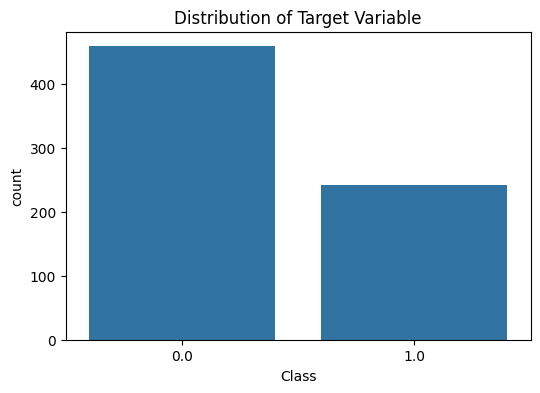

In [4]:
# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Target Variable')
plt.show()

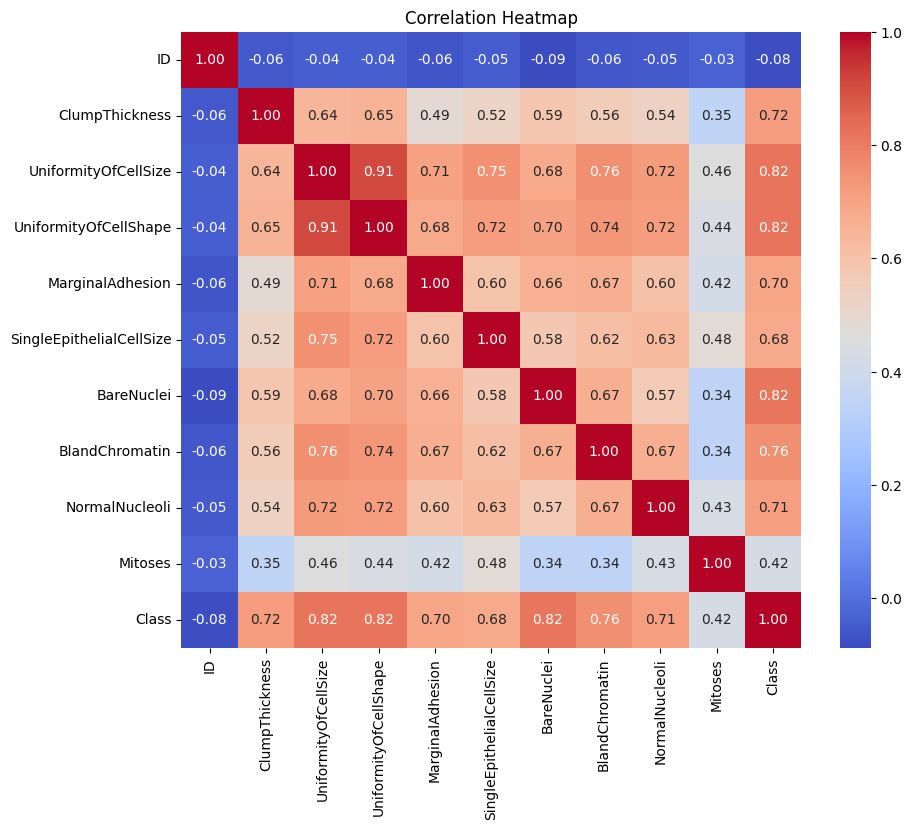

In [5]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

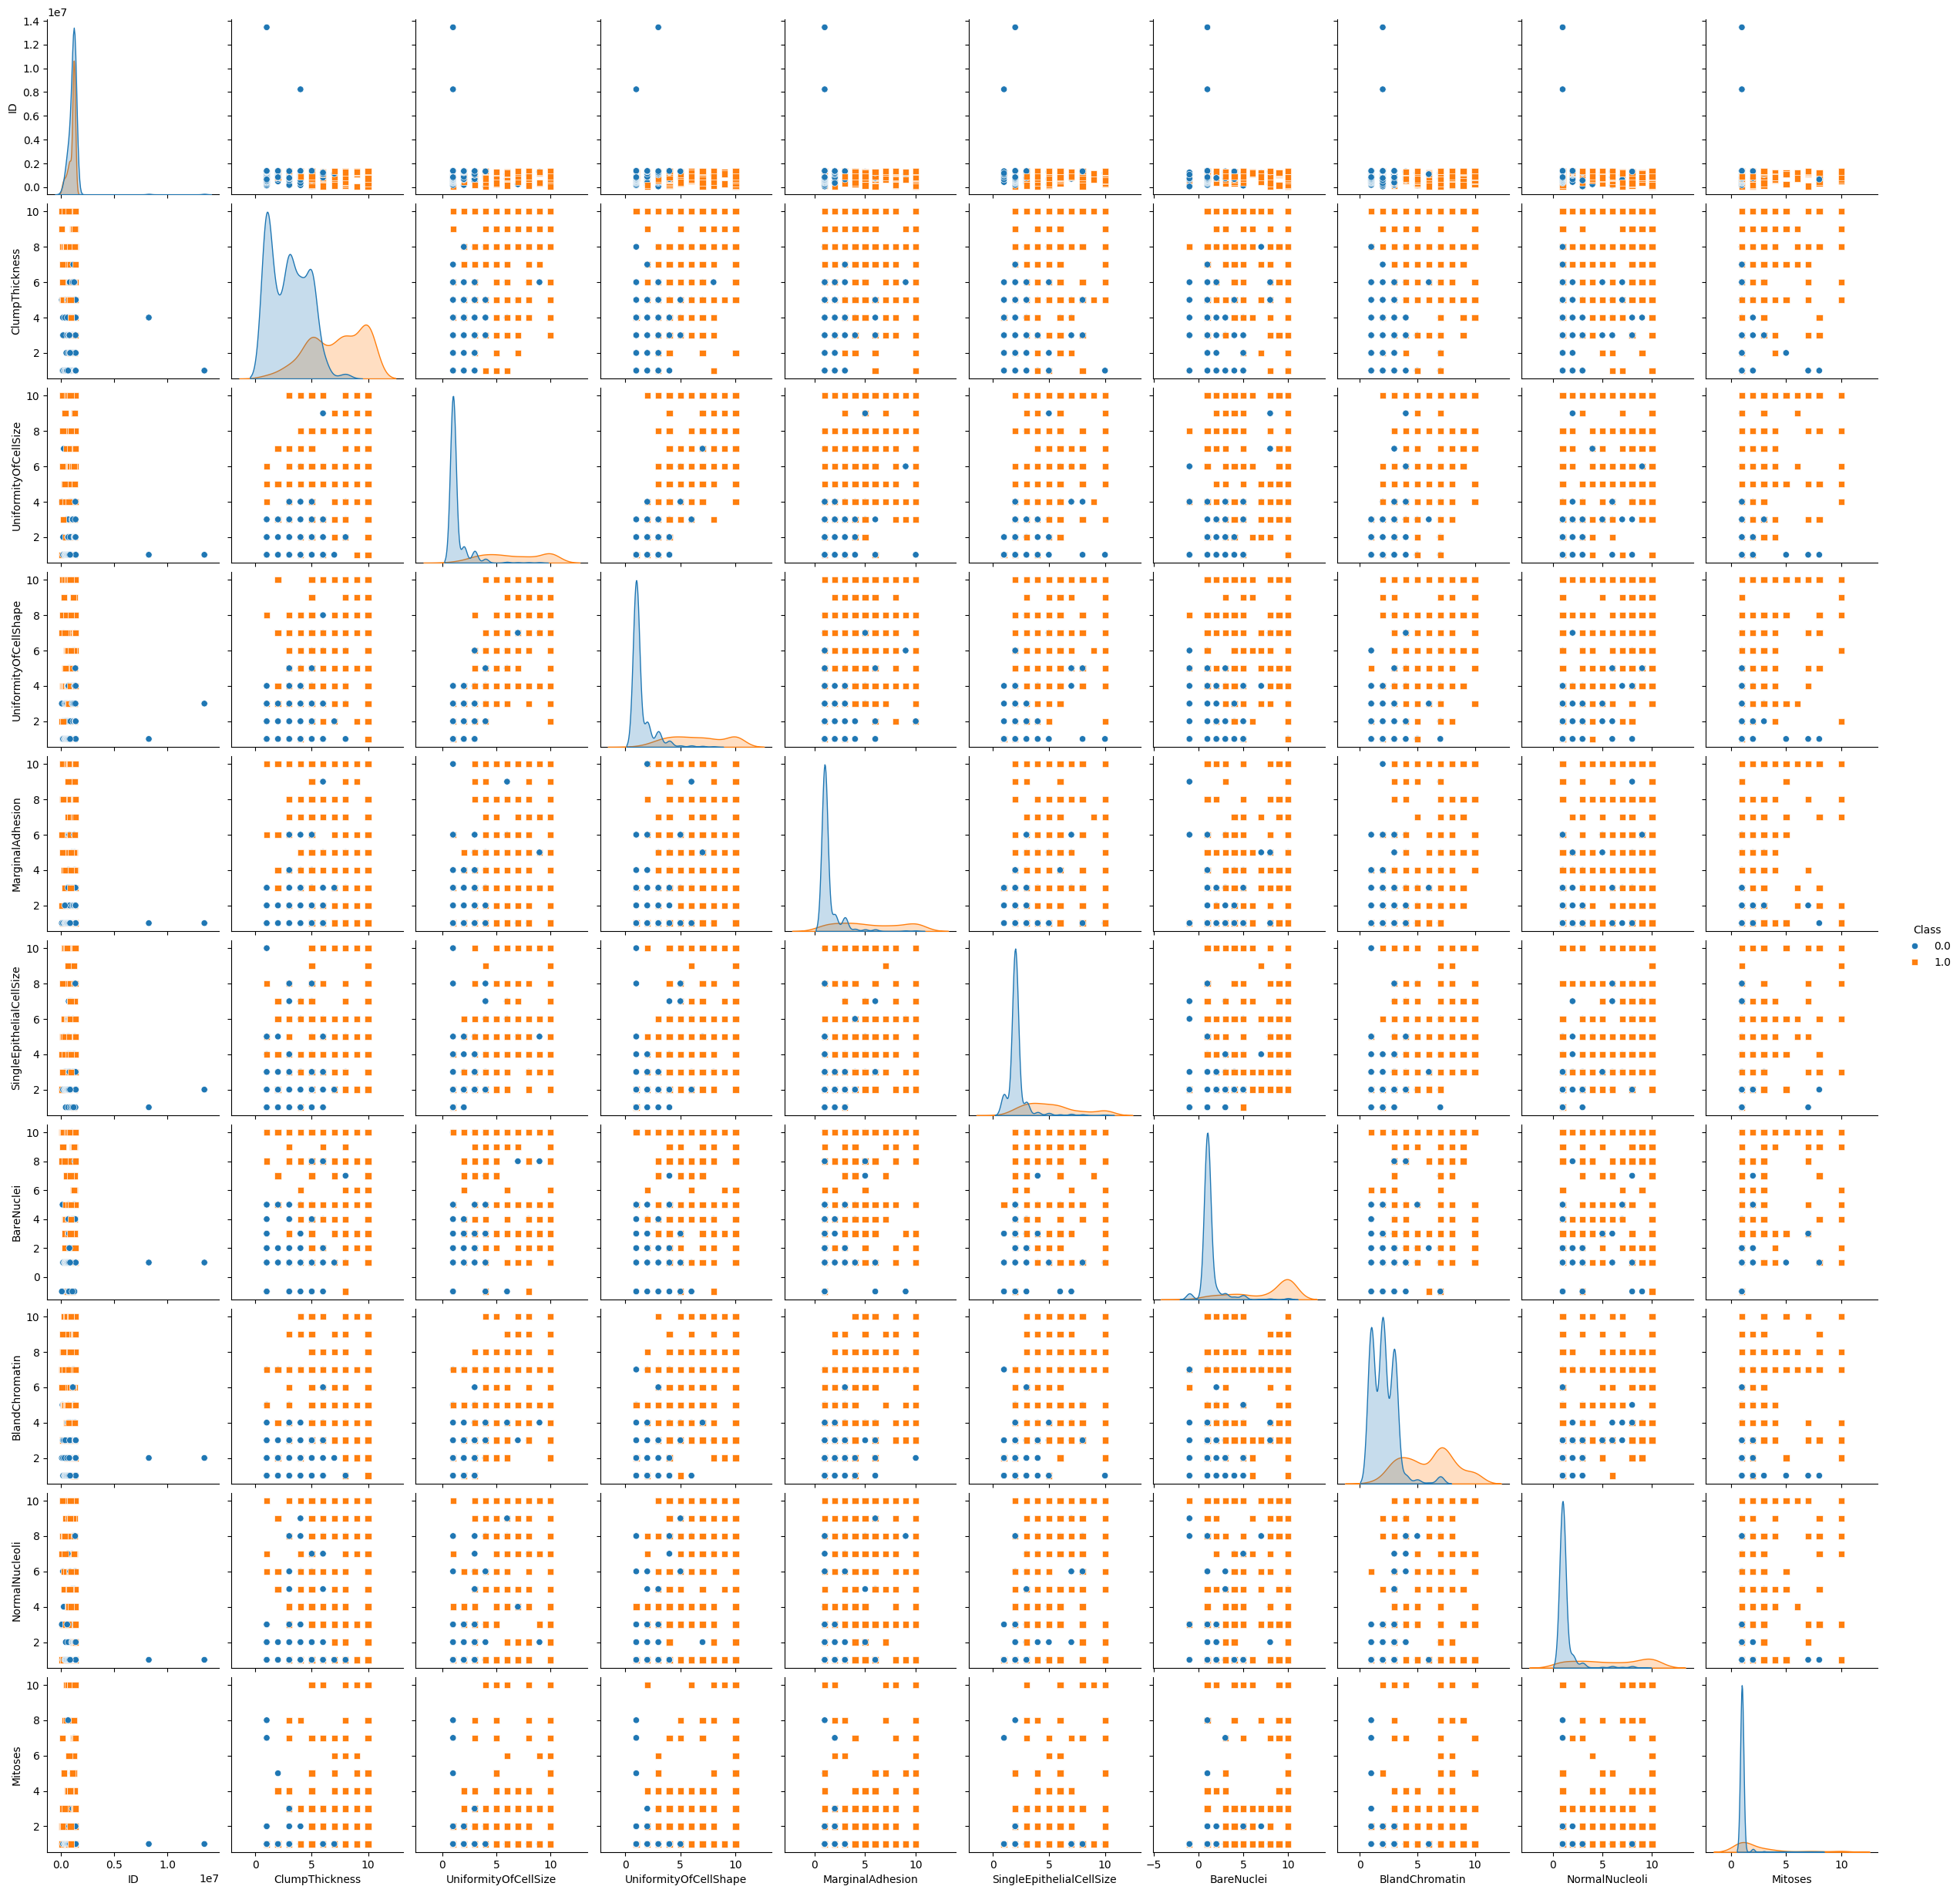

In [6]:
# Pairplot
sns.pairplot(df, hue='Class', markers=["o", "s"], diag_kind='kde')
plt.show()

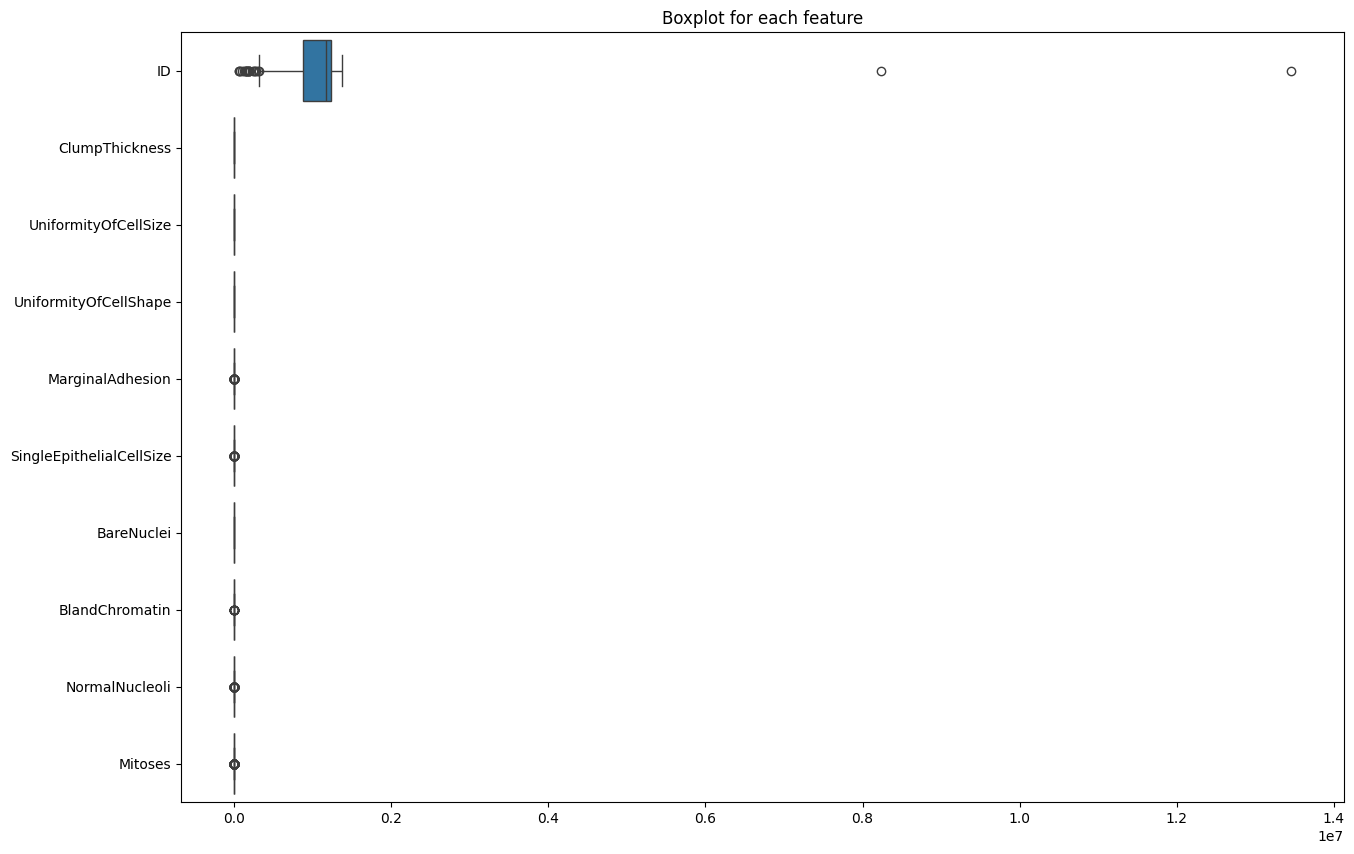

In [7]:
# Boxplot for each feature
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop(columns=['Class']), orient='h')
plt.title('Boxplot for each feature')
plt.show()

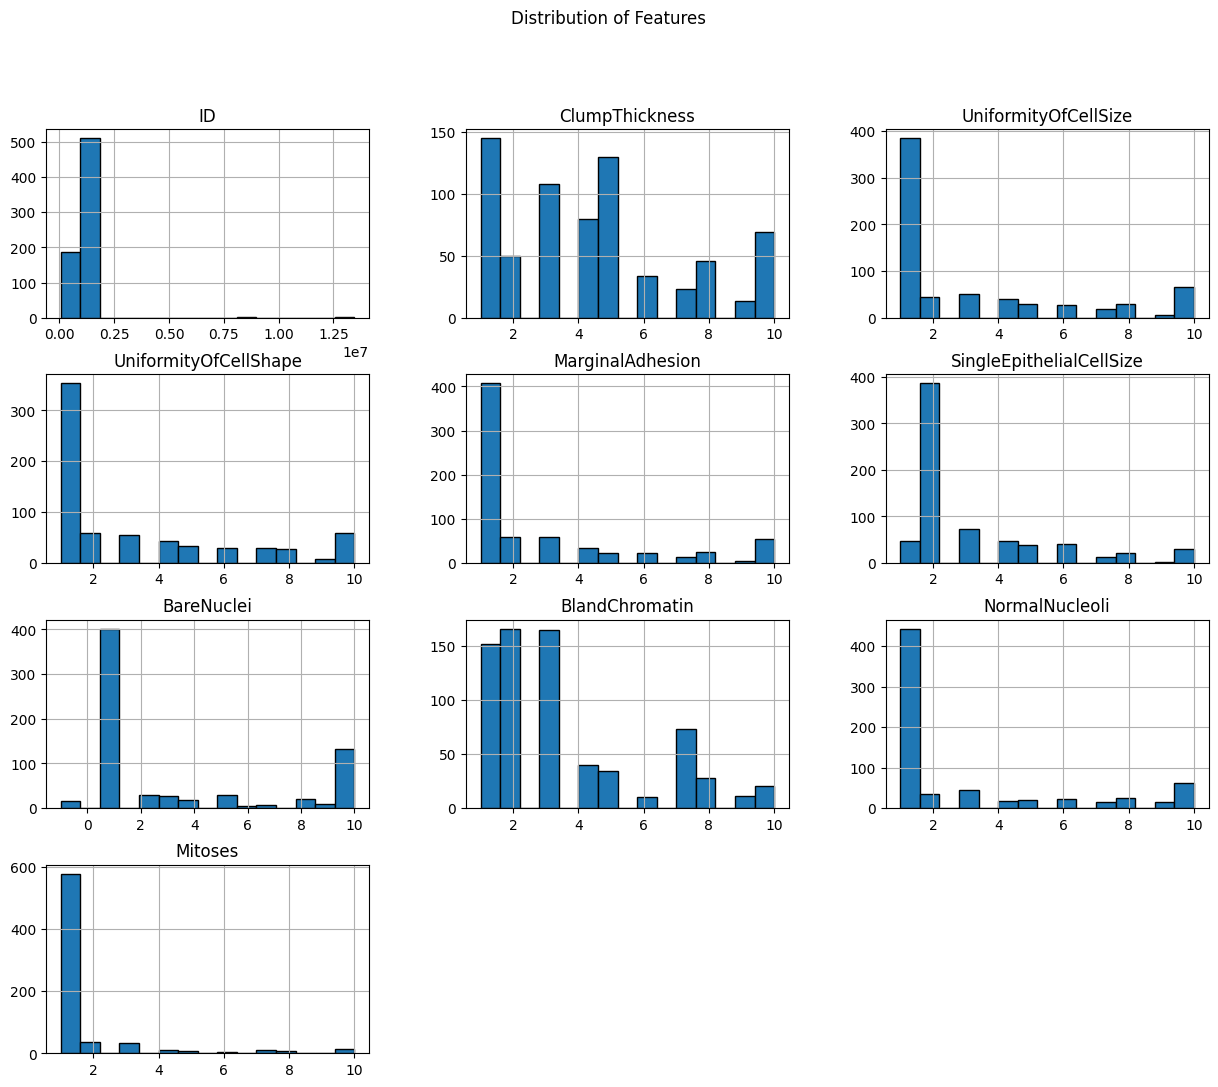

In [8]:
# Distribution plots for each feature
df.drop(columns=['Class']).hist(figsize=(15, 12), bins=15, edgecolor='black')
plt.suptitle('Distribution of Features')
plt.show()

In [9]:
# Features and target variable
X = df.drop(columns=['Class', 'ID'])
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 489
Testing set size: 210


In [10]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Predictions on training set
train_preds = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

Training Accuracy: 100.00%


In [12]:
# Predictions on testing set
test_preds = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

Testing Accuracy: 97.14%


In [13]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, test_preds)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[140   3]
 [  3  64]]


In [14]:
# Classification report
print('Classification Report:')
print(classification_report(y_test, test_preds))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       143
         1.0       0.96      0.96      0.96        67

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210



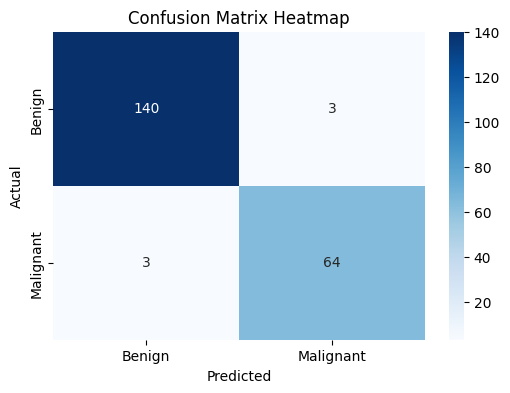

In [15]:
# Confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

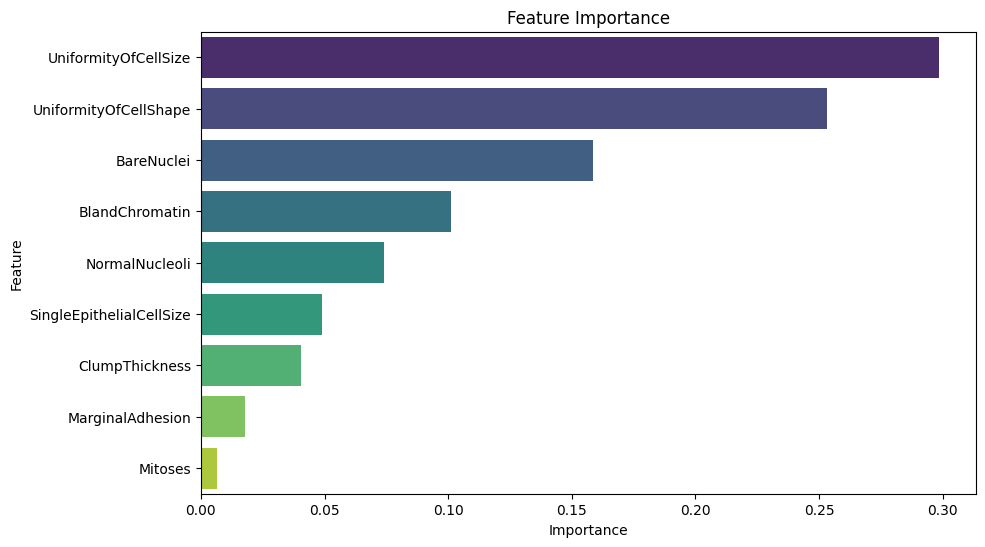

In [16]:
# Feature importance
feature_importance = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', hue='Feature')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()